In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
inputs = r'.\graphing_inputs'
outputs = r'.\outputs'

### sample table

In [3]:
example = pd.read_csv("example_2015.csv")
example.columns

Index(['county_id', 'was_developed', 'was_redeveloped', 'residential_units',
       'job_spaces', 'job_spaces_added', 'res_units_added', 'building_count',
       'households_count', 'households_added', 'acreage_dev', 'acreage_redev',
       'total_value', 'value_added_dev', 'value_added_redev',
       'res_units_added_dev', 'res_units_added_redev', 'acreage_dev_res',
       'acreage_dev_nonres', 'acreage_redev_res', 'acreage_redev_nonres',
       'value_added_dev_res', 'value_added_dev_nonres',
       'jobs_accom_food_added', 'jobs_gov_edu_added', 'jobs_health_added',
       'jobs_manuf_added', 'jobs_office_added', 'jobs_other_added',
       'jobs_retail_added', 'jobs_wholesale_added'],
      dtype='object')

In [4]:
example.head(3)

,county_id,was_developed,was_redeveloped,residential_units,job_spaces,job_spaces_added,res_units_added,building_count,households_count,households_added,...,value_added_dev_res,value_added_dev_nonres,jobs_accom_food_added,jobs_gov_edu_added,jobs_health_added,jobs_manuf_added,jobs_office_added,jobs_other_added,jobs_retail_added,jobs_wholesale_added
0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,440,215,114552.0,173224.0,549.0,5579.0,97341.0,106420.0,2.0,...,5.475577e+08,4.625873e+06,0.0,0.0,0.0,0.0,0.0,-129.0,-138.0,-6.0
2,35,153,64,406211.0,849948.0,3435.0,3745.0,331992.0,377703.0,16.0,...,3.418728e+08,5.162664e+08,-25.0,-1.0,-1.0,0.0,-50.0,-11.0,-20.0,0.0


### functions

In [5]:
# create dataframe with values of specified attribute by year
def create_county_dataframe(field, export=False):
    
    # create empty list
    rows = []
    
    # get list of files
#     csvs = glob.glob(r'.\graphing_inputs\*_county_dev.csv')
    csvs = glob.glob(r'.\graphing_inputs\*_county_progression_metrics.csv')
    for csv in csvs:

        # get the year
#         year= csv[26:30]
        year= csv[31:35]

        # read in table
        df = pd.read_csv(csv)
        
        # get value for each county
        davis = float(df[df['county_id']== 11][field])
        saltlake = float(df[df['county_id']== 35][field])
        utah = float(df[df['county_id']== 49][field])
        weber = float(df[df['county_id']== 57][field])
        
        # form the row and append to the list
        row = (year, davis, saltlake, utah, weber)
        rows.append(row)

    # create dataframe from list of tuples, convert year col to int, filter to 2050 and earlier
    df2 = pd.DataFrame(rows, columns=["year", "davis", "salt_lake", "utah", "weber"])
    df2['year'] = df2['year'].astype(int)
    df2 = df2[df2['year'] <= 2050]

    # export to csv
    if export == True: 
        df2.to_csv(os.path.join(outputs, "remm_yearly_{}.csv".format(field)))
    
    return df2

In [6]:
# create dataframe for specific parcel with values of specified attribute by year
def create_parcel_dataframe(parcel_id, field, export=False):
    
    # create empty list
    rows = []
    
    # get list of files
#     csvs = glob.glob(r'.\graphing_inputs\*_county_dev.csv')
    csvs = glob.glob(r'.\parcel_data\*_parcel_devprog.csv')
    for csv in csvs:

        # get the year
#         year= csv[26:30]
        year= csv[27:31]

        # read in table
        df = pd.read_csv(csv)
        
        # get value for each county
        parcel = float(df[df['parcel_id']== parcel_id][field])
        
        # form the row and append to the list
        row = (year, parcel)
        rows.append(row)

    # create dataframe from list of tuples, convert year col to int, filter to 2050 and earlier
    df2 = pd.DataFrame(rows, columns=["year", field])
    df2['year'] = df2['year'].astype(int)
    df2 = df2[df2['year'] <= 2050]

    # export to csv
    if export == True: 
        df2.to_csv(os.path.join(outputs, "remm_yearly_parcel_{}_{}.csv".format(parcel_id,field)))
    
    return df2

### job spaces added

<AxesSubplot:title={'center':'REMM: Total Job Spaces Added By Year'}, xlabel='year'>

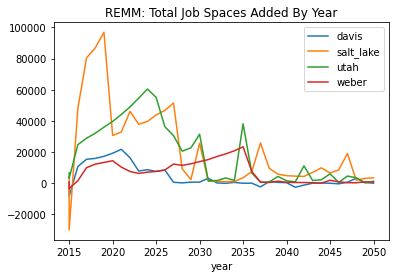

In [7]:
df = create_county_dataframe('job_spaces_added')
df.set_index('year').plot(title='REMM: Total Job Spaces Added By Year')

### Accomodation/Food Jobs Added

<AxesSubplot:title={'center':'REMM: Accomodation/Food Job Spaces Added By Year'}, xlabel='year'>

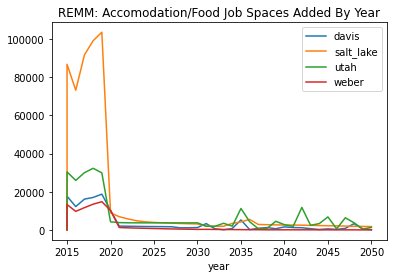

In [8]:
df = create_county_dataframe('jobs_accom_food_added')
df.set_index('year').plot(title='REMM: Accomodation/Food Job Spaces Added By Year')

### Government/Education Jobs Added

<AxesSubplot:title={'center':'REMM: Govt/Education Job Spaces Added By Year'}, xlabel='year'>

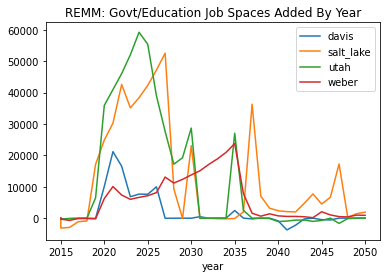

In [9]:
df = create_county_dataframe('jobs_gov_edu_added')
df.set_index('year').plot(title='REMM: Govt/Education Job Spaces Added By Year')

### Health Jobs Added

<AxesSubplot:title={'center':'REMM: Health Job Spaces Added By Year'}, xlabel='year'>

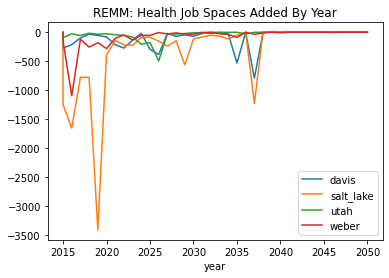

In [10]:
df = create_county_dataframe('jobs_health_added')
df.set_index('year').plot(title='REMM: Health Job Spaces Added By Year')

### Manufacturing Jobs Added

<AxesSubplot:title={'center':'REMM: Manufacturing Job Spaces Added By Year'}, xlabel='year'>

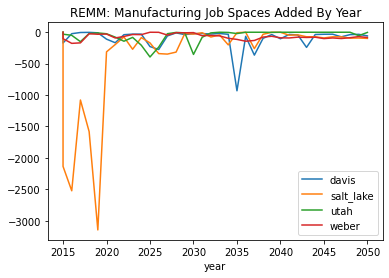

In [11]:
df = create_county_dataframe('jobs_manuf_added')
df.set_index('year').plot(title='REMM: Manufacturing Job Spaces Added By Year')

### Office Jobs Added

<AxesSubplot:title={'center':'REMM: Ofice Job Spaces Added By Year'}, xlabel='year'>

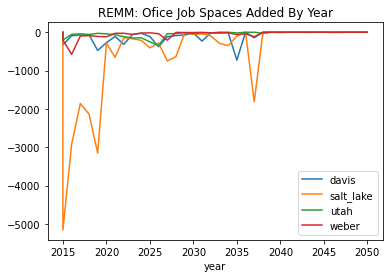

In [12]:
df = create_county_dataframe('jobs_office_added')
df.set_index('year').plot(title='REMM: Ofice Job Spaces Added By Year')

### Other Jobs Added

<AxesSubplot:title={'center':'REMM: Other Job Spaces Added By Year'}, xlabel='year'>

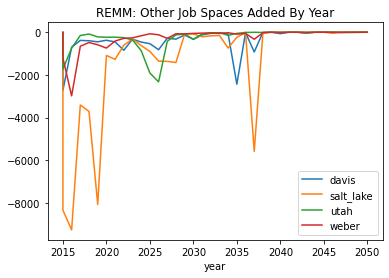

In [13]:
df = create_county_dataframe('jobs_other_added')
df.set_index('year').plot(title='REMM: Other Job Spaces Added By Year')

### Retail Jobs Added

<AxesSubplot:title={'center':'REMM: Retail Job Spaces Added By Year'}, xlabel='year'>

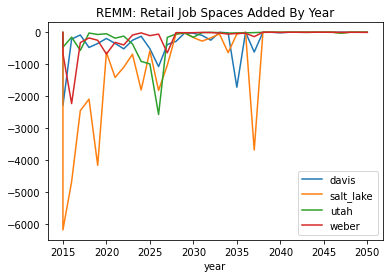

In [14]:
df = create_county_dataframe('jobs_retail_added')
df.set_index('year').plot(title='REMM: Retail Job Spaces Added By Year')

### Wholesale Jobs Added

<AxesSubplot:title={'center':'REMM: Wholesale Job Spaces Added By Year'}, xlabel='year'>

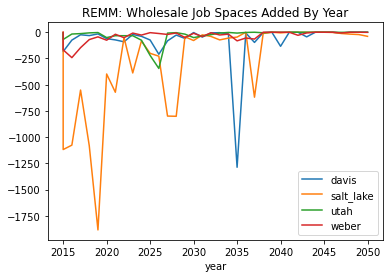

In [15]:
df = create_county_dataframe('jobs_wholesale_added')
df.set_index('year').plot(title='REMM: Wholesale Job Spaces Added By Year')

### acreage developed

<AxesSubplot:title={'center':'REMM: Acres of Greenfield Developed By Year'}, xlabel='year'>

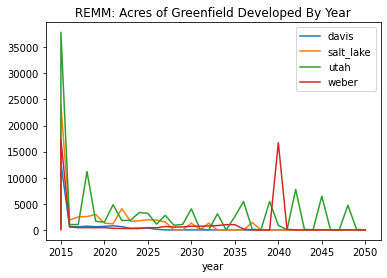

In [16]:
df1 = create_county_dataframe('acreage_dev')
df1.set_index('year').plot(title='REMM: Acres of Greenfield Developed By Year')

### acreage redeveloped

<AxesSubplot:title={'center':'REMM: Acres Redeveloped By Year'}, xlabel='year'>

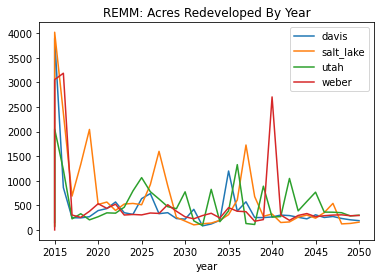

In [17]:
df2 = create_county_dataframe('acreage_redev')
df2.set_index('year').plot(title='REMM: Acres Redeveloped By Year')

### total acreage developed

<AxesSubplot:title={'center':'REMM: Total Acres Developed By Year'}, xlabel='year'>

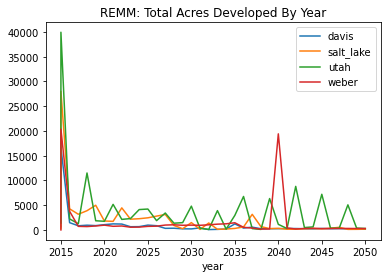

In [18]:
# get the total acreage developed by county (fix year)
df3 = df1 + df2
df3['year'] = df3['year']/2
df3.set_index('year').plot(title='REMM: Total Acres Developed By Year')

### residential units added by year

<AxesSubplot:title={'center':'REMM: Residential Units Added By Year'}, xlabel='year'>

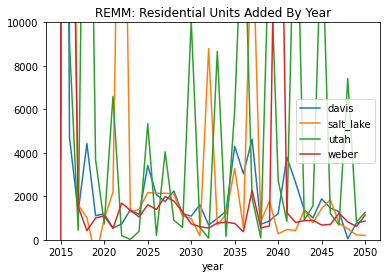

In [19]:
df = create_county_dataframe('res_units_added')
df.set_index('year').plot(title='REMM: Residential Units Added By Year', ylim=(0,10000))

### residential units added by year (development)

<AxesSubplot:title={'center':'REMM: Residential Units Added By Year (Greenfield)'}, xlabel='year'>

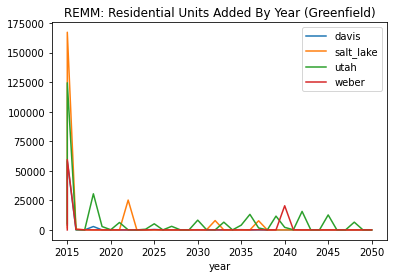

In [20]:
df = create_county_dataframe('res_units_added_dev')
df.set_index('year').plot(title='REMM: Residential Units Added By Year (Greenfield)')

### residential units added by year (redevelopment)

<AxesSubplot:title={'center':'REMM: Residential Units Added By Year (Redevelopment)'}, xlabel='year'>

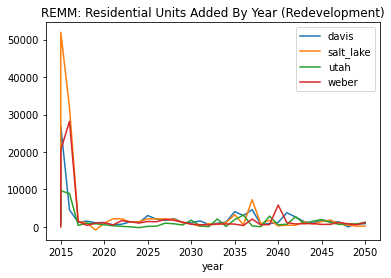

In [21]:
df = create_county_dataframe('res_units_added_redev')
df.set_index('year').plot(title='REMM: Residential Units Added By Year (Redevelopment)')

### value added (development)

<AxesSubplot:title={'center':'REMM: Value Added By Year (Greenfield)'}, xlabel='year'>

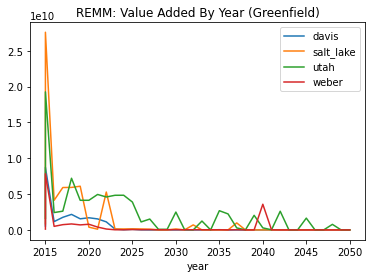

In [22]:
df1 = create_county_dataframe('value_added_dev')
df1.set_index('year').plot(title='REMM: Value Added By Year (Greenfield)')

### value added (redevelopment)

<AxesSubplot:title={'center':'REMM: Value Added By Year (Redevelopment)'}, xlabel='year'>

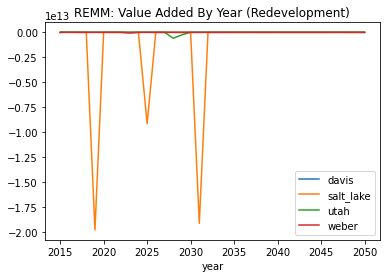

In [23]:
df2 = create_county_dataframe('value_added_redev')
df2.set_index('year').plot(title='REMM: Value Added By Year (Redevelopment)')
# df.set_index('year').plot(title='REMM: Value Added By Year (Redevelopment)', ylim=(-1e10,1e10))

### total value added

<AxesSubplot:title={'center':'REMM: Total Value Added By Year'}, xlabel='year'>

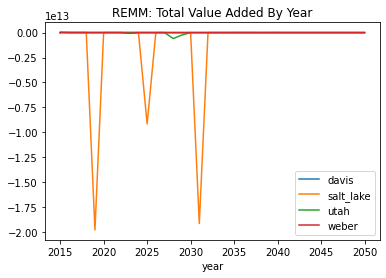

In [24]:
# get the total acreage developed by county (fix year)
df3 = df1 + df2
df3['year'] = df3['year']/2
df3.set_index('year').plot(title='REMM: Total Value Added By Year')

### Total Households

<AxesSubplot:title={'center':'REMM: Total Households'}, xlabel='year'>

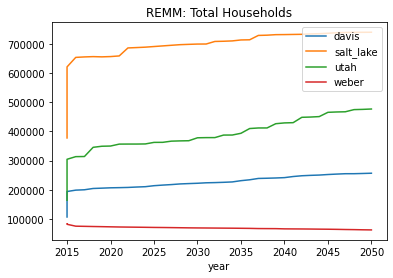

In [25]:
df = create_county_dataframe('households_count')
df.set_index('year').plot(title='REMM: Total Households')

### Households Added

<AxesSubplot:title={'center':'REMM: Total Households Added'}, xlabel='year'>

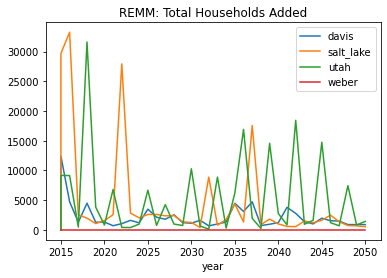

In [26]:
df = create_county_dataframe('households_added')
df.set_index('year').plot(title='REMM: Total Households Added')

### Residential Units

<AxesSubplot:title={'center':'REMM: Residential Units'}, xlabel='year'>

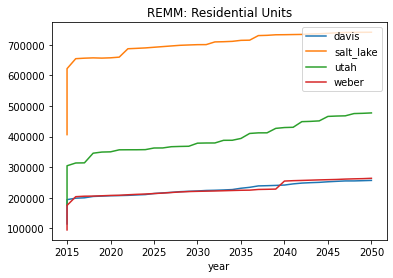

In [27]:
df = create_county_dataframe('residential_units')
df.set_index('year').plot(title='REMM: Residential Units')

### Parcels Developed (Greenfield)

<AxesSubplot:title={'center':'REMM: Parcels Developed (Greenfield)'}, xlabel='year'>

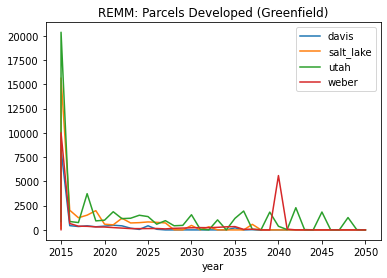

In [28]:
df = create_county_dataframe('was_developed')
df.set_index('year').plot(title='REMM: Parcels Developed (Greenfield)')

### Parcels Redeveloped

<AxesSubplot:title={'center':'REMM: Parcels Redeveloped'}, xlabel='year'>

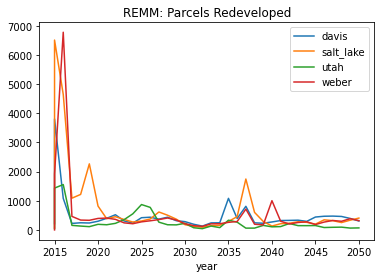

In [29]:
df = create_county_dataframe('was_redeveloped')
df.set_index('year').plot(title='REMM: Parcels Redeveloped')

### Residential Value added by year (Greenfield)

<AxesSubplot:title={'center':'      REMM: Residential Value added by year (Greenfield)'}, xlabel='year'>

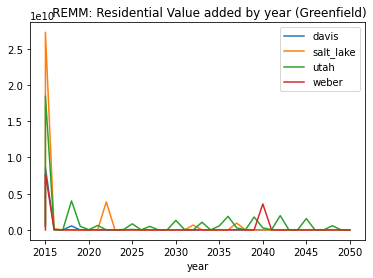

In [30]:
df = create_county_dataframe('value_added_dev_res')
df.set_index('year').plot(title='      REMM: Residential Value added by year (Greenfield)')

### Non-residential Value added by year (Greenfield)

<AxesSubplot:title={'center':'                 REMM: Non-Residential Value added by year (Greenfield)'}, xlabel='year'>

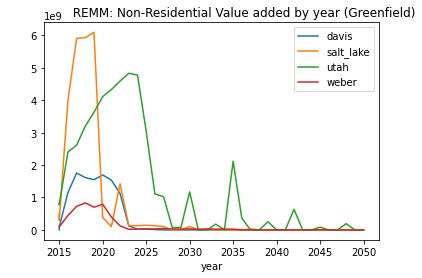

In [31]:
df = create_county_dataframe('value_added_dev_nonres')
df.set_index('year').plot(title='                 REMM: Non-Residential Value added by year (Greenfield)')